**Automobile dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("/content/Automobile.csv")


In [15]:
print(df.head())
print(df.tail())


                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4    3449          10.5          70    usa  
                name   mpg  cylinders  displacement  horsepower  weight  \
393  ford mustang gl  27.0          4         140.0        86.0    2790   
394        vw pickup  44.0          4          97.0        52.0    2130   
395    dodge rampage  32.0          4         135.0   

In [16]:
print(df.columns)


Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')


In [18]:
missing_values = df.isnull().sum()
print(missing_values)

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [20]:
# a
print("Dimension of the dataset", df.shape)
print("structure of the dataset", df.info())
print("Summary of the dataset", df.describe())

Dimension of the dataset (398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
structure of the dataset None
Summary of the dataset               mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160  

<Figure size 800x400 with 0 Axes>

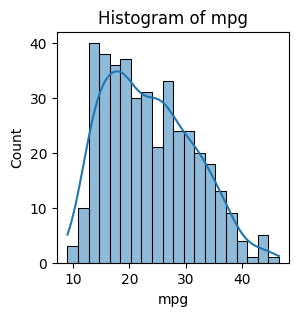

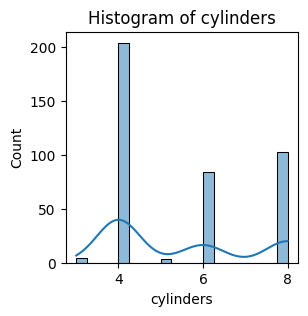

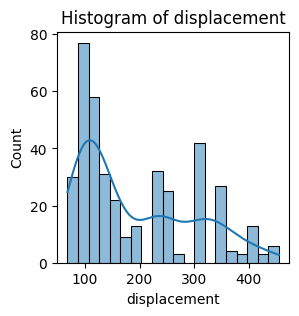

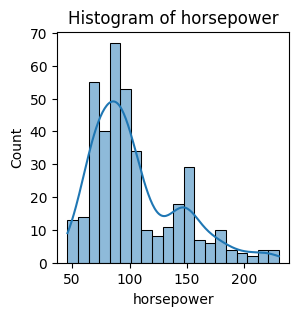

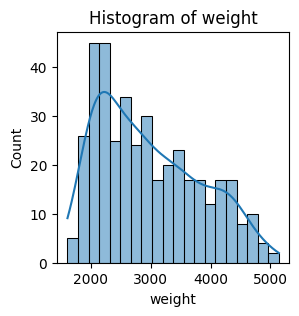

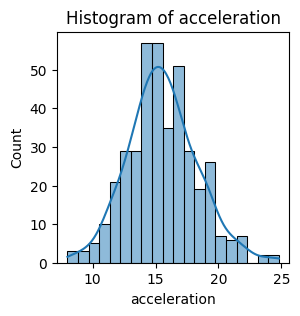

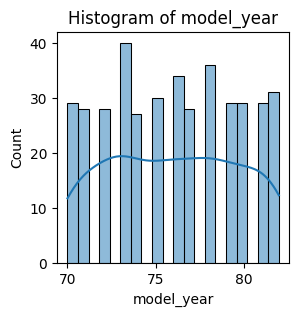

In [28]:
#c
continuous_var = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 4))
plt.suptitle("Histogram of Continuous Variables")
for column in continuous_var.columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(continuous_var[column], bins=20, kde=True)
    plt.title(f"Histogram of {column}")
    plt.show()

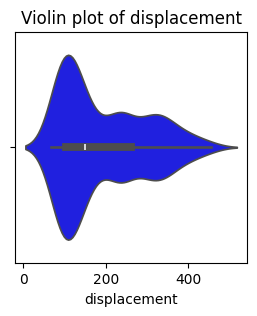

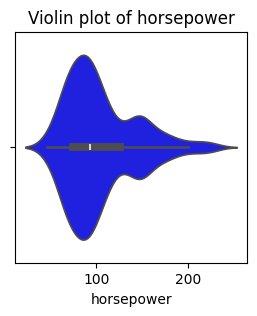

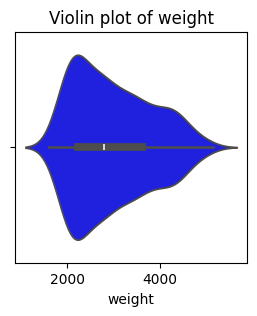

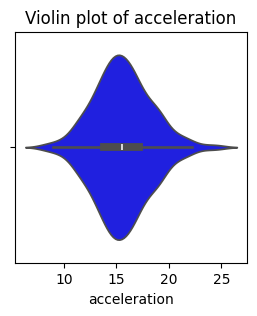

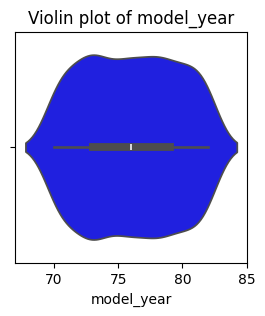

In [31]:
# D
for col in continuous_var.columns[2:]:
    plt.figure(figsize=(3, 3))
    sns.violinplot(x=col, data=df, color="blue")
    plt.title(f"Violin plot of {col}")
    plt.show()


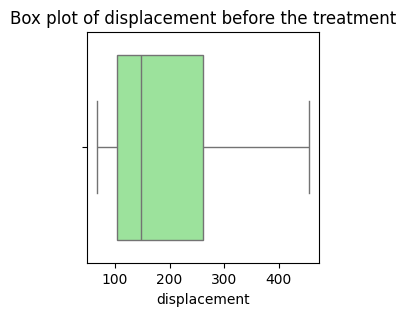

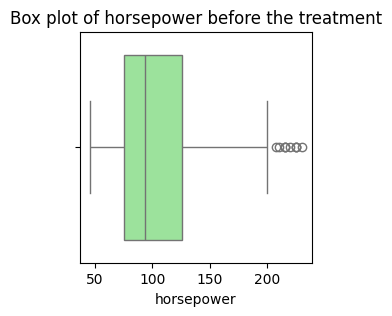

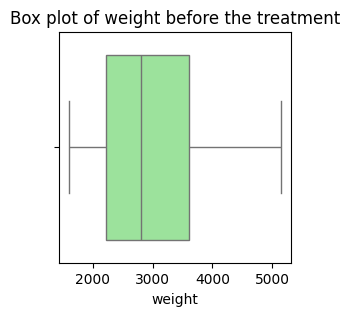

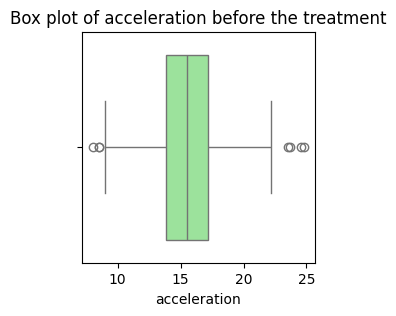

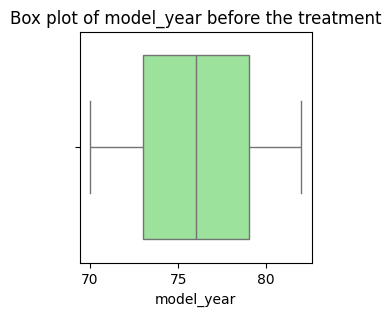

In [36]:
#E
for col in continuous_var.columns[2:]:
    plt.figure(figsize=(3, 3))
    sns.boxplot(x=col, data=df, color="lightgreen")
    plt.title(f"Box plot of {col} before the treatment")
    plt.show()



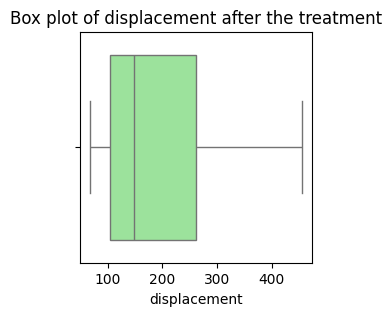

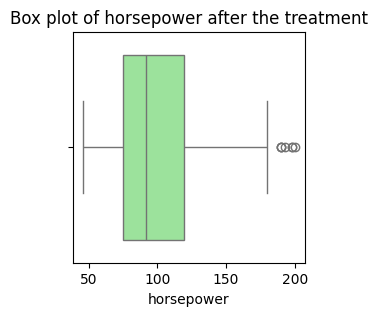

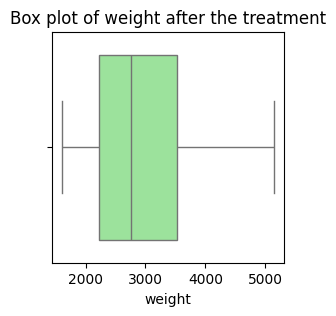

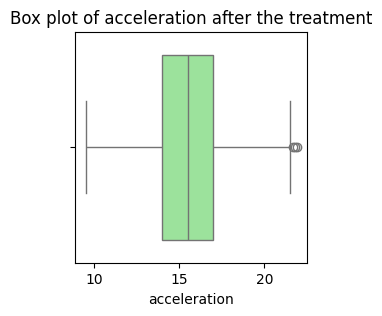

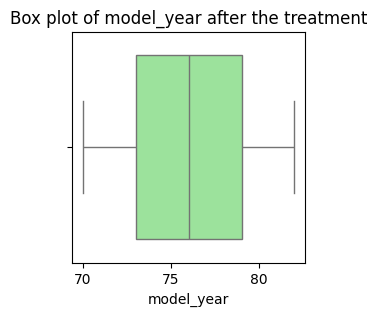

In [38]:
for col in continuous_var.columns[2:]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    plt.figure(figsize=(3, 3))
    sns.boxplot(x=col, data=df, color="lightgreen")
    plt.title(f"Box plot of {col} after the treatment")
    plt.show()


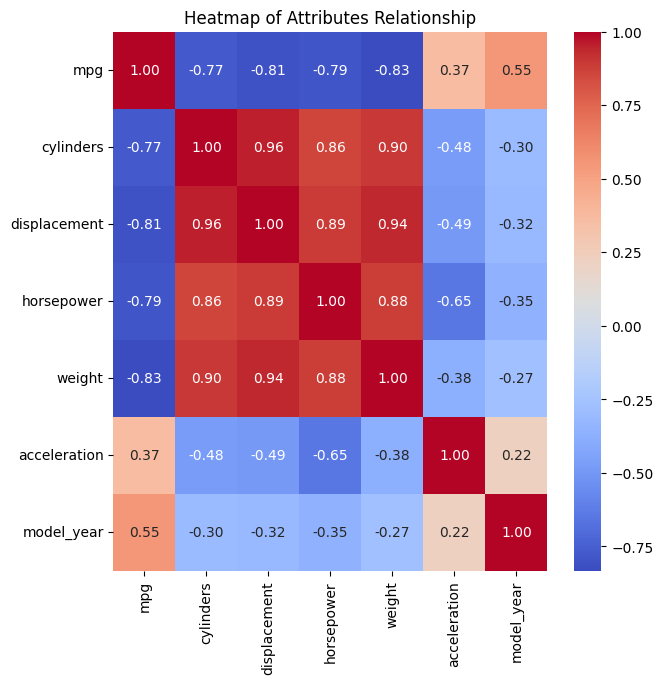

In [45]:
# f
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Attributes Relationship")
plt.show()


In [ ]:
# G  (Not working)
Scaler = standardscaler()
df[continuoes_var]=Scaler.fit_transform(df[continuous_var])
print("continuoes variable after standerd scaling")
df[continuous_var].head()